1.   Обучите сеть без скрытых слоев (постройте аналог обычной линейной модели). Какое accuracy вы получили на валидации?
2.   Обучите сеть с двумя скрытыми слоями по 128 нейронов в каждом. Какое accuracy на валидации получили?

In [1]:
# Для воспроизводимости кода установим определенную версию tensorflow и keras
!pip install tensorflow==2.11.0

In [2]:
!pip install keras==2.11.0

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [31]:
# скачиваем данные
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

In [32]:
# что за данные
print(x_train.shape)
print(x_val.shape)
print (y_train[:10])
print (y_val[:10])

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


In [33]:
x_train_flat = x_train.reshape(-1, 28*28).astype(float) # Преобразуем тренировочные данные в векторы
print(x_train.shape, x_train_flat.shape) # Выводим формы оригинального и преобразованного массива

x_val_flat = x_val.reshape(-1, 28*28).astype(float)
print(x_val.shape, x_val_flat.shape)

(60000, 28, 28) (60000, 784)
(10000, 28, 28) (10000, 784)


In [34]:
# центрируем и нормируем, так сети будет проще учиться
# Делим значения пикселей на 255, чтобы нормализовать их в диапазон [0, 1]
# Вычитаем 0.5, чтобы центрировать данные вокруг 0 (диапазон [-0.5, 0.5])

x_train_float = x_train_flat.astype(float) / 255 - 0.5
x_val_float = x_val_flat.astype(float) / 255 - 0.5

In [35]:
# one-hot encode для ответов
# Преобразуем метки классов y_train и y_val в формат one-hot
# Каждая метка будет представлена бинарным вектором длины 10 (по количеству классов)
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape) # Выводим форму one-hot закодированных меток
print(y_train_oh[:5], y_train[:5]) # Выводим первые 5 one-hot меток и соответствующие оригинальные метки для проверки

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] [5 0 4 1 9]


----

Обучить сеть без скрытых слоев (построить аналог обычной линейной модели)

In [36]:
clear_session()

In [37]:
# Архитектура сети
model = Sequential() # Определяем модель как последовательную (слои добавляются один за другим)

# Первый слой
model.add(layers.Input(shape=(x_train_float.shape[1],)))

# Выходной слой (Dense): 10 нейронов (по одному для каждого класса), активация softmax для предсказания вероятностей
model.add(layers.Dense(10, activation='softmax',)) # выходной слой

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(
    loss='categorical_crossentropy',  # минимизируем кросс-энтропию
    optimizer='adam',  # так будет быстрее, позже узнаем что это :)
    metrics=['accuracy']  # выводим процент правильных ответов
)

In [40]:
history = model.fit(
                    x_train_float,
                    y_train_oh,
                    batch_size=64,  # 64 объекта для подсчета градиента на каждом шаге
                    epochs=10,  # 10 проходов по датасету
                    validation_data=(x_val_float, y_val_oh)
                    )

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7479 - loss: 0.8967 - val_accuracy: 0.9026 - val_loss: 0.3490
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8991 - loss: 0.3524 - val_accuracy: 0.9101 - val_loss: 0.3116
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9072 - loss: 0.3242 - val_accuracy: 0.9160 - val_loss: 0.2977
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9107 - loss: 0.3082 - val_accuracy: 0.9166 - val_loss: 0.2889
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9148 - loss: 0.2961 - val_accuracy: 0.9221 - val_loss: 0.2833
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9162 - loss: 0.2933 - val_accuracy: 0.9212 - val_loss: 0.2860
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9183 - loss: 0.2923 - val_accuracy: 0.9179 - val_loss: 0.2836
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9211 - loss: 0.2839 - val_accuracy: 0.

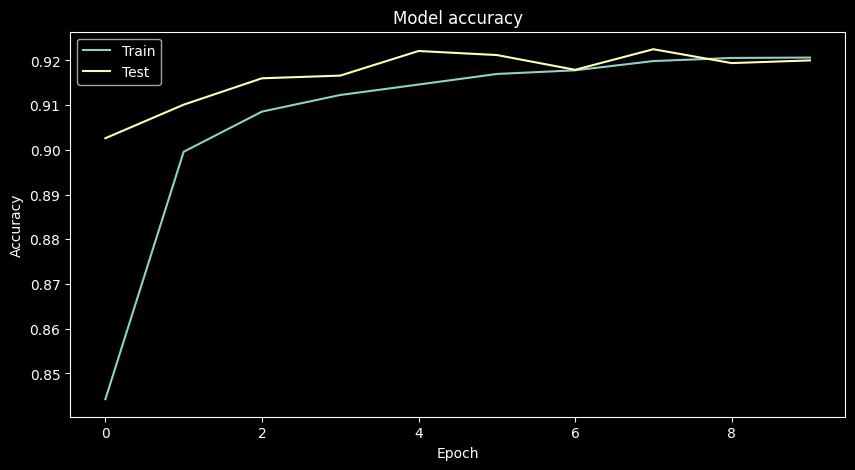

In [41]:
# Визуализация значений точности (accuracy) на тренировочных и валидационных данных
# plt.style.use(['dark_background']) # Устанавливаем стиль графика (темный фон)
fig, ax = plt.subplots(figsize=(10, 5)) # Создаем объект фигуры и осей с размером 10x5 дюймов

# Строим графики точности модели на тренировочных и валидационных данных
plt.plot(history.history['accuracy']) # Точность на тренировочных данных
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

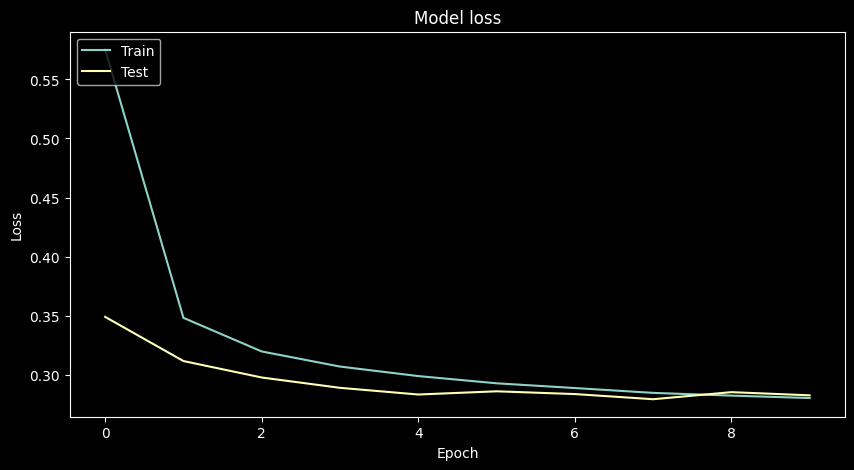

In [42]:
# Plot training & validation loss values
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [43]:
# Прогнозирование классов для валидационных данных
model.predict(x_val_float)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.42016195e-05, 7.05735248e-10, 6.39505815e-05, ...,
        9.95330513e-01, 1.11375175e-05, 1.67821985e-04],
       [2.85442569e-03, 1.51219519e-05, 9.35970426e-01, ...,
        6.58914113e-13, 1.88976573e-03, 1.21643928e-09],
       [1.03969978e-06, 9.81248975e-01, 8.69460218e-03, ...,
        2.17367220e-03, 2.00349512e-03, 1.46671824e-04],
       ...,
       [1.95290060e-08, 3.28294298e-08, 7.93452728e-06, ...,
        4.65659279e-04, 4.83433623e-03, 4.69777454e-03],
       [2.88089050e-05, 8.64430840e-05, 4.83567128e-05, ...,
        3.02994795e-06, 5.77255599e-02, 1.29684831e-05],
       [5.67031975e-06, 2.89754375e-12, 5.36706902e-05, ...,
        5.41572273e-11, 3.23791909e-07, 2.63688404e-09]], dtype=float32)

In [44]:
# финальные предсказанные классы
np.argmax(model.predict(x_val_float), axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [45]:
model.predict(x_val_float)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([2.42016195e-05, 7.05735248e-10, 6.39505815e-05, 4.38397145e-03,
       9.30521594e-07, 1.74387224e-05, 2.17494556e-09, 9.95330513e-01,
       1.11375175e-05, 1.67821985e-04], dtype=float32)

In [46]:
# Прогнозируем метки классов для валидационных данных
predicts = np.argmax(model.predict(x_val_float), axis = 1)

# Выводим точность на тестовых (валидационных) данных
print('Test Accuracy: ', accuracy_score(y_val, predicts))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Accuracy:  0.92


---

Обучить сеть с двумя скрытыми слоями по 128 нейронов в каждом

In [47]:
clear_session()

In [48]:
# Архитектура сети
model = Sequential() # Определяем модель как последовательную (слои добавляются один за другим)

# Первый скрытый слой (Dense): 128 нейронов, активация ReLU
# Input_shape задает размер входных данных (размерность признаков), равный числу пикселей (784)
model.add(Dense(128, activation='relu', input_shape=(x_train_float.shape[1],)))

# Второй скрытый слой (Dense): 128 нейронов, активация ReLU
model.add(Dense(128, activation='relu',))

# Выходной слой (Dense): 10 нейронов (по одному для каждого класса), активация softmax для предсказания вероятностей
model.add(Dense(10, activation='softmax',)) # выходной слой

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(
    loss='categorical_crossentropy',  # минимизируем кросс-энтропию
    optimizer='adam',  # так будет быстрее, позже узнаем что это :)
    metrics=['accuracy']  # выводим процент правильных ответов
)

In [51]:
history = model.fit(
                    x_train_float,
                    y_train_oh,
                    batch_size=64,  # 64 объекта для подсчета градиента на каждом шаге
                    epochs=10,  # 10 проходов по датасету
                    validation_data=(x_val_float, y_val_oh)
                    )

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8294 - loss: 0.5682 - val_accuracy: 0.9435 - val_loss: 0.1782
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9461 - loss: 0.1787 - val_accuracy: 0.9584 - val_loss: 0.1314
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9630 - loss: 0.1188 - val_accuracy: 0.9673 - val_loss: 0.1068
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9693 - loss: 0.0973 - val_accuracy: 0.9692 - val_loss: 0.0970
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9735 - loss: 0.0826 - val_accuracy: 0.9677 - val_loss: 0.1020
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9770 - loss: 0.0707 - val_accuracy: 0.9672 - val_loss: 0.1068
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9801 - loss: 0.0639 - val_accuracy: 0.9750 - val_loss: 0.0803
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9820 - loss: 0.0544 - val_accuracy: 0.

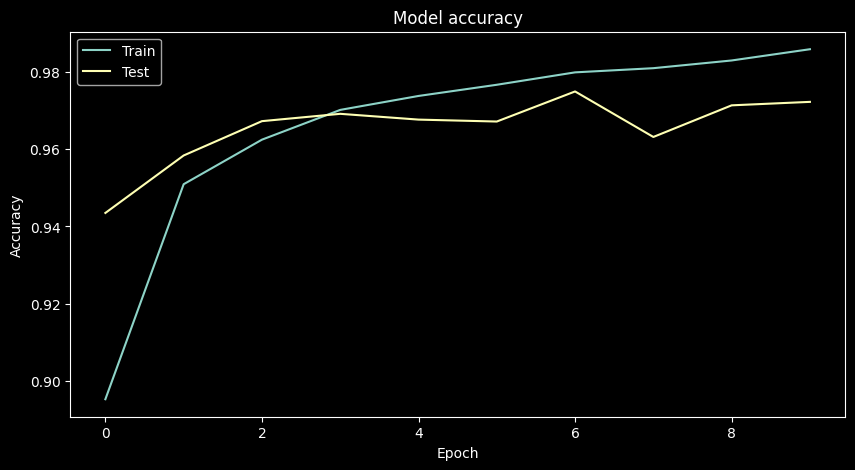

In [52]:
# Визуализация значений точности (accuracy) на тренировочных и валидационных данных
# plt.style.use(['dark_background']) # Устанавливаем стиль графика (темный фон)
fig, ax = plt.subplots(figsize=(10, 5)) # Создаем объект фигуры и осей с размером 10x5 дюймов

# Строим графики точности модели на тренировочных и валидационных данных
plt.plot(history.history['accuracy']) # Точность на тренировочных данных
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

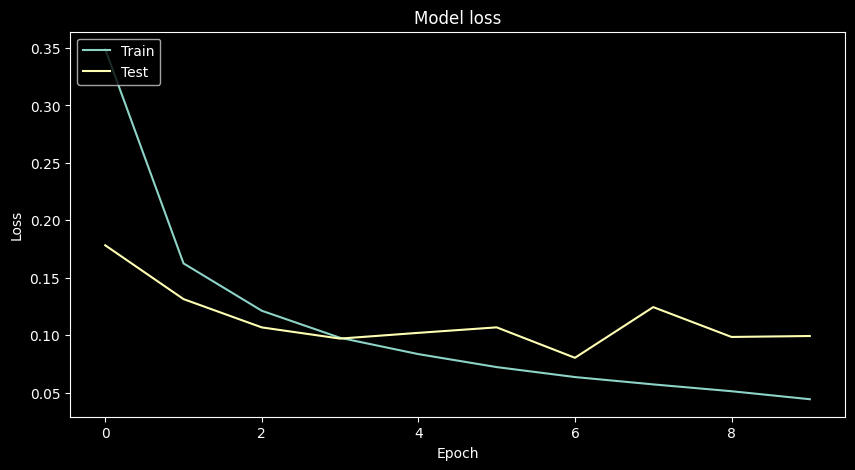

In [53]:
# Plot training & validation loss values
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [54]:
# Прогнозирование классов для валидационных данных
model.predict(x_val_float)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[3.5865728e-09, 7.9209578e-08, 8.3866854e-07, ..., 9.9999523e-01,
        1.5053068e-09, 7.9993306e-08],
       [5.3876010e-09, 3.7647858e-06, 9.9999607e-01, ..., 4.7190228e-14,
        2.3971181e-08, 1.4936261e-15],
       [7.3335821e-10, 9.9999177e-01, 1.1457620e-07, ..., 7.7357236e-06,
        3.1293354e-08, 7.5964962e-10],
       ...,
       [1.7942374e-13, 1.9373173e-11, 3.1243583e-14, ..., 8.7088374e-08,
        3.3595531e-09, 3.1372679e-07],
       [4.3812647e-09, 6.6840783e-11, 5.2977549e-12, ..., 6.1265939e-07,
        5.5823096e-10, 1.6190717e-11],
       [4.2823488e-12, 7.1387257e-11, 2.7004340e-10, ..., 1.1259912e-15,
        8.1725071e-09, 1.3029002e-12]], dtype=float32)

In [55]:
# финальные предсказанные классы
np.argmax(model.predict(x_val_float), axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [56]:
model.predict(x_val_float)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3.5865728e-09, 7.9209578e-08, 8.3866854e-07, 3.7324330e-06,
       2.8055767e-12, 2.0673737e-08, 1.2730955e-13, 9.9999523e-01,
       1.5053068e-09, 7.9993306e-08], dtype=float32)

In [57]:
# Прогнозируем метки классов для валидационных данных
predicts = np.argmax(model.predict(x_val_float), axis = 1)

# Выводим точность на тестовых (валидационных) данных
print('Test Accuracy: ', accuracy_score(y_val, predicts))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Accuracy:  0.9723
